# Importing and looking at data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data/CarPricesPrediction.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
data.describe(include='all')

,Make,Model,Year,Mileage,Condition,Price
count,1000,1000,1000.00000,1000.000000,1000,1000.000000
unique,5,5,NaN,NaN,3,NaN
top,Chevrolet,Altima,NaN,NaN,Excellent,NaN
freq,209,226,NaN,NaN,595,NaN
mean,NaN,NaN,2015.86500,78796.927000,NaN,22195.205650
std,NaN,NaN,3.78247,39842.259941,NaN,4245.191585
min,NaN,NaN,2010.00000,10079.000000,NaN,12613.000000
25%,NaN,NaN,2013.00000,44942.750000,NaN,18961.862500
50%,NaN,NaN,2016.00000,78056.500000,NaN,22247.875000
75%,NaN,NaN,2019.00000,112366.250000,NaN,25510.275000


# Looking at the data

In [7]:
print(data.columns)

Index(['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')


In [8]:
categorical_nonord = data[['Make', 'Model']]
categorical_nonord_cols = ['Make', 'Model', 'Condition']

categorical_ord = data['Condition']
categorical_ord_cols = ['Condition']

numerical = data[['Year', 'Mileage', 'Price']]
numerical_cols = ['Year', 'Mileage', 'Price']

### Numeric Values

__Checking for Null__ 

In [9]:
print(str(numerical.isnull().sum()) + '\n')

print(numerical.info())

Year       0
Mileage    0
Price      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     1000 non-null   int64  
 1   Mileage  1000 non-null   int64  
 2   Price    1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB
None


No missing values found

__Fixing Year Column__

In [10]:
pd.set_option('mode.chained_assignment', None)
numerical['Age'] = 2024 - numerical['Year']
numerical.drop(columns=['Year'], inplace=True)

numerical_cols = ['Age', 'Mileage', 'Price']

Changing Year column to represent age instead of year.

__Look at Statistics__

In [11]:
print(numerical.describe())

             Mileage         Price         Age
count    1000.000000   1000.000000  1000.00000
mean    78796.927000  22195.205650     8.13500
std     39842.259941   4245.191585     3.78247
min     10079.000000  12613.000000     2.00000
25%     44942.750000  18961.862500     5.00000
50%     78056.500000  22247.875000     8.00000
75%    112366.250000  25510.275000    11.00000
max    149794.000000  31414.900000    14.00000


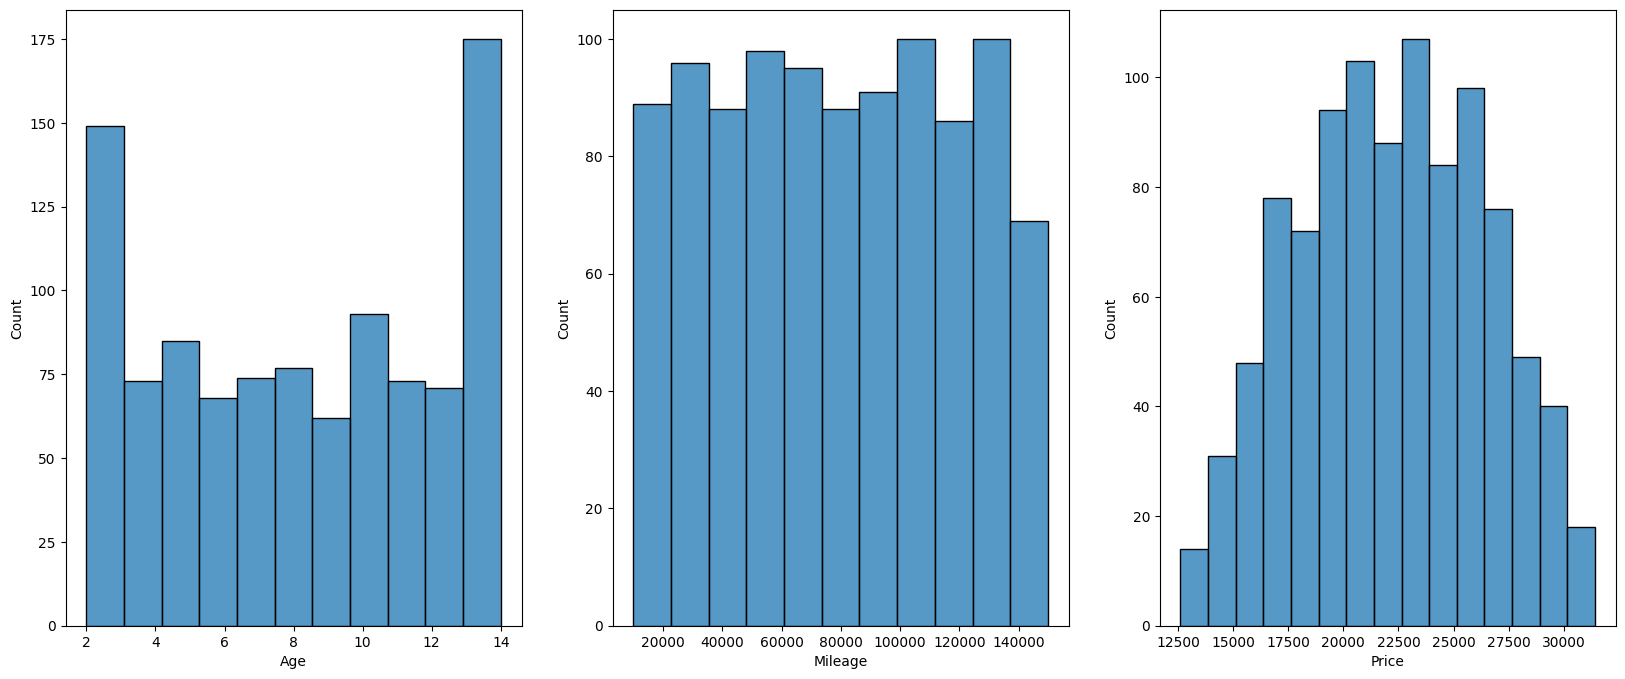

In [12]:
plt.figure(figsize=(20, 8))

for index, col in enumerate(numerical_cols):
    plt.subplot(1, 3, index+1)

    sns.histplot(numerical[col])

__Look for Outliers__

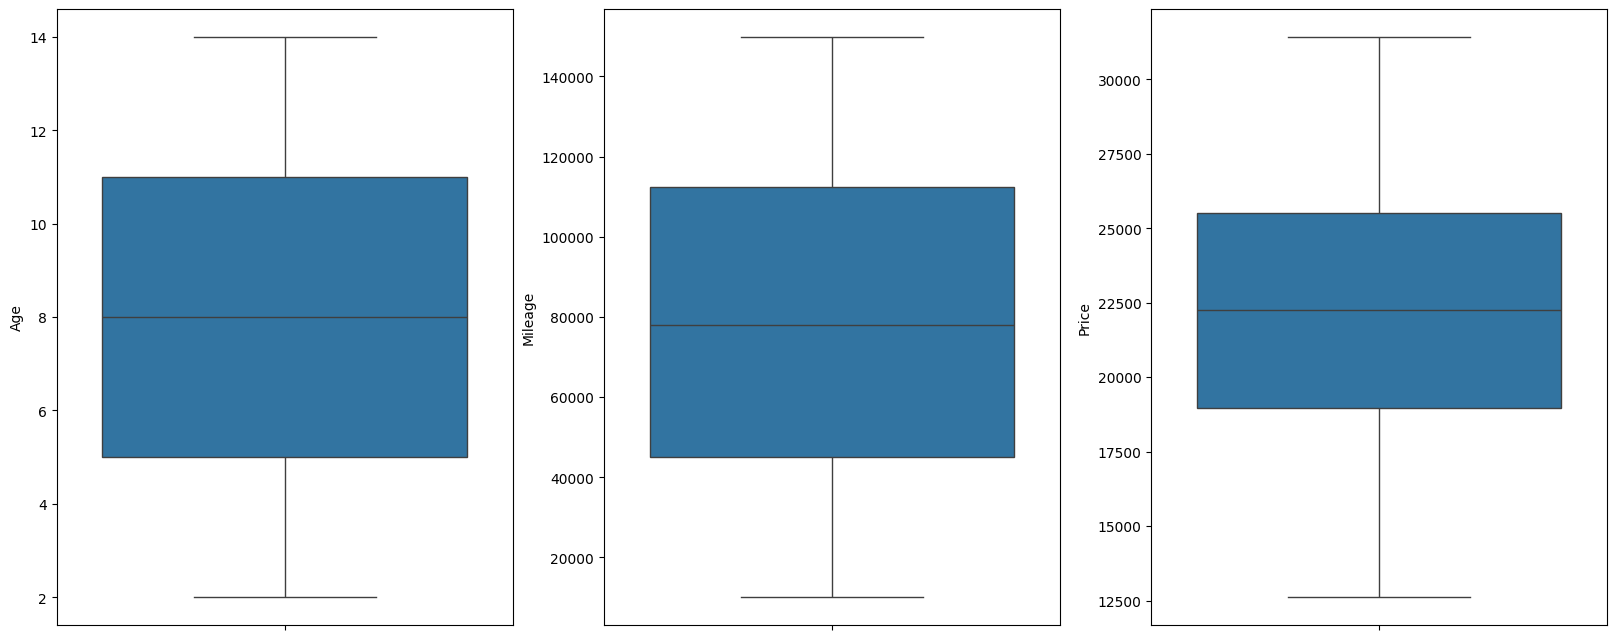

In [13]:
plt.figure(figsize=(20, 8))

for index, col in enumerate(numerical_cols):
    plt.subplot(1, 3, index+1)

    sns.boxplot(numerical[col])

### Categorial Non-Ordinal

__Checking for Null/Missing Data__

In [14]:
print(categorical_nonord.isnull().sum())

Make     0
Model    0
dtype: int64


no missing values

__Checking Balance of Categories__

Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64


Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: count, dtype: int64




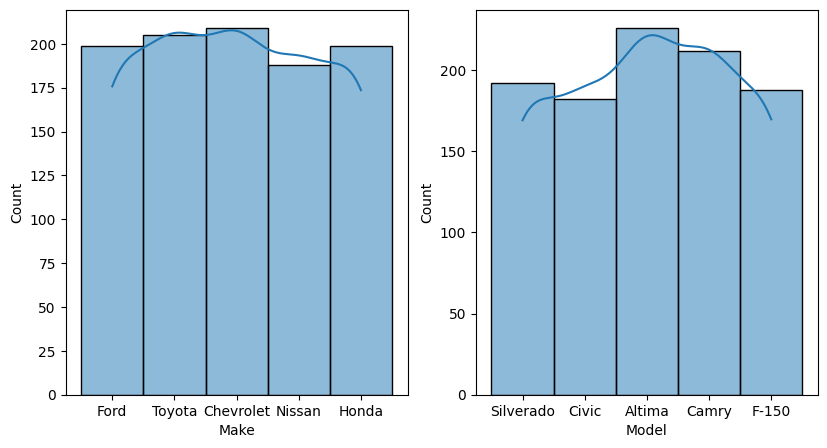

In [15]:
for col in categorical_nonord.columns:
    print(categorical_nonord[col].value_counts())
    print('\n')

plt.figure(figsize=(15,5))

for index, col in enumerate(categorical_nonord):
    plt.subplot(1, 3, (index+1))
    sns.histplot(data[col], kde=True, kde_kws={'bw_adjust': 1.5})
plt.show()

Values are spread pretty evenly with the 24% range between lowest and highest values for model.

__Encoding Variables__

In [16]:
ohe = OneHotEncoder()
categorical_nonord = pd.get_dummies(categorical_nonord)
print(categorical_nonord.columns)

Index(['Make_Chevrolet', 'Make_Ford', 'Make_Honda', 'Make_Nissan',
       'Make_Toyota', 'Model_Altima', 'Model_Camry', 'Model_Civic',
       'Model_F-150', 'Model_Silverado'],
      dtype='object')


### Categorial Ordinal

__Checking for Null__

In [17]:
print("Null Value Count: " + str(categorical_ord.isnull().sum()) + "\n")

print(categorical_ord.value_counts())

Null Value Count: 0

Condition
Excellent    595
Good         292
Fair         113
Name: count, dtype: int64


No null values seen.

__Encoding Variable__

In [18]:
print(categorical_ord)

0      Excellent
1      Excellent
2           Good
3      Excellent
4      Excellent
         ...    
995    Excellent
996    Excellent
997         Good
998         Good
999    Excellent
Name: Condition, Length: 1000, dtype: object


In [19]:
categorical_ord = categorical_ord.map({'Excellent': 2, 'Good': 1, 'Fair': 0}).fillna(-1)

# Setting Up X & y

In [20]:
X = pd.concat([categorical_nonord, categorical_ord, numerical], axis=1)
X.drop(columns=['Price'], inplace=True)
y = numerical['Price']

In [21]:
print(X.head(1))

   Make_Chevrolet  Make_Ford  Make_Honda  Make_Nissan  Make_Toyota  \
0           False       True       False        False        False   

   Model_Altima  Model_Camry  Model_Civic  Model_F-150  Model_Silverado  \
0         False        False        False        False             True   

   Condition  Mileage  Age  
0          2    18107    2  


## Checking correlation

<Axes: >

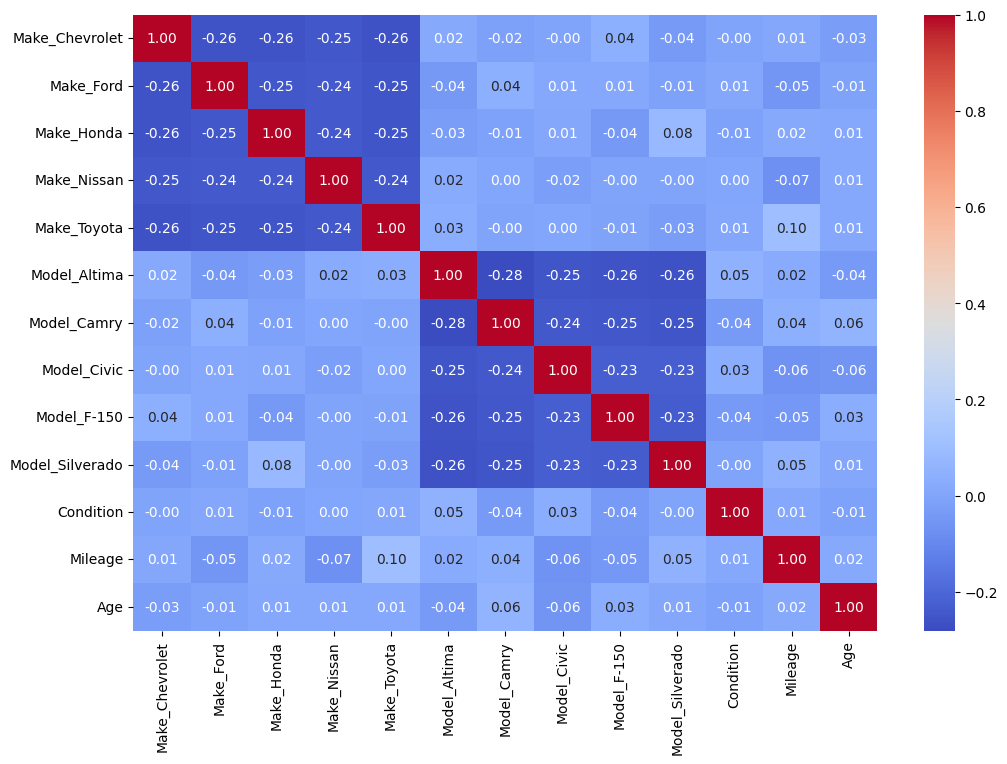

In [22]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

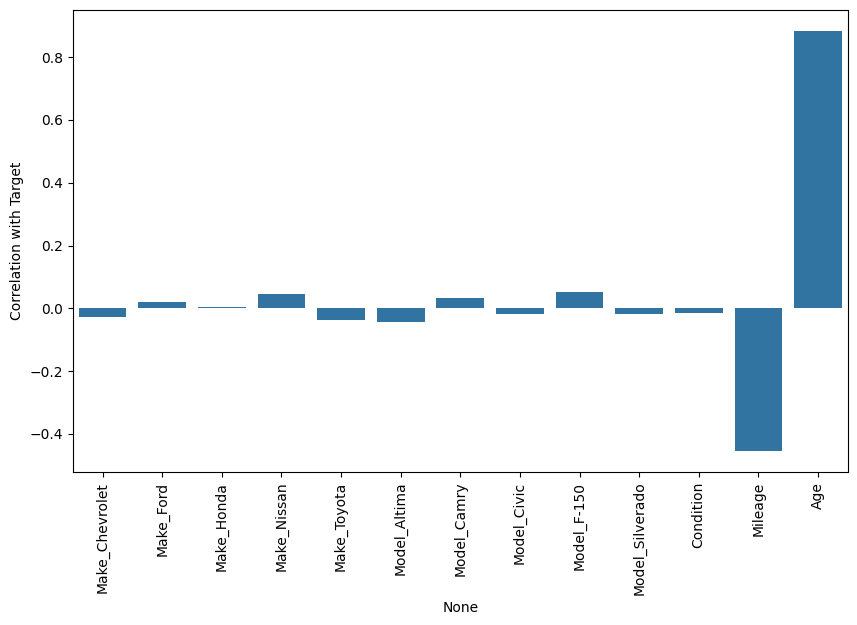

In [23]:
correlation_with_target = X.corrwith(y)

correlation_df = correlation_with_target.to_frame(name='Correlation with Target')

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y=correlation_df['Correlation with Target'])
plt.xticks(rotation=90)
plt.show()

# Splitting X & y Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Model Testing & Training

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
pred = pd.DataFrame(model.predict(X_test))
print(pred.head())

              0
0  23105.851396
1  28536.810434
2  16194.151433
3  17165.217869
4  18875.253148


In [28]:
prices = pd.concat([y_test.reset_index(drop=True), pred.reset_index(drop=True)], axis=1)
prices.columns = ['Actual', 'Predicted']
print(prices)

       Actual     Predicted
0    23105.80  23105.851396
1    28536.85  28536.810434
2    16194.20  16194.151433
3    17165.25  17165.217869
4    18875.20  18875.253148
..        ...           ...
195  15967.85  15967.811860
196  16910.05  16910.014497
197  25291.45  25291.599155
198  19821.85  19821.802016
199  21400.35  21400.305573

[200 rows x 2 columns]


# Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
mse = mean_squared_error(y_test, pred)
rmse = mse ** .5
r2 = r2_score(y_test, pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MSE: 0.004772081897763708
RMSE: 0.06908025693180149
R-squared: 0.9999999997224602
